# Amasando los datos

El objetivo de este módulo es aprender a cargar datos, limpiarlos, y manipularlos. Es decir, cargar un archivo de texto básico, y aprender a hacer operaciones básicas (estadísticas), unir dos fuentes de datos, y operaciones mas complejas como el concepto de `split-apply-combine`. 

Para esto, usaremos una estructura llamada *Dataframe*.  Esta es la estructura básica de los paquetes para manejo de datos, para casi todos los lenguajes o software, y las instrucciones son muy similares entre unos y otros.  

En Python, esto está incorporado dentro del paquete `Panda`

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Panda tiene un nuevo tipo para almacenar datos, las `Series` que corresponden a una **columna** de datos, y los `Dataframe`, que son varias columnas de datos con los mismo indices.   

Primero cargamos los datos (Ojo, los datos vienen con un registro "NA" para aquellos que no son validos):

In [106]:
dataTrips = pd.read_csv("trips_new.csv")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [107]:
dataTrips

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,9,2011-07-28T10:12:00.04,23.0,2011-07-28T10:12:00.04,23.0,B00468,Registered,97217,1976.0,Male
1,9,220,2011-07-28T10:21:00.04,23.0,2011-07-28T10:25:00.04,23.0,B00554,Registered,2215,1966.0,Male
2,10,56,2011-07-28T10:33:00.04,23.0,2011-07-28T10:34:00.04,23.0,B00456,Registered,2108,1943.0,Male
3,11,64,2011-07-28T10:35:00.04,23.0,2011-07-28T10:36:00.04,23.0,B00554,Registered,2116,1981.0,Female
4,12,12,2011-07-28T10:37:00.04,23.0,2011-07-28T10:37:00.04,23.0,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,527,2012-10-01T20:24:00.04,46.0,2012-10-01T20:32:00.04,67.0,B00486,Casual,NaN,NaN,NaN
552069,623508,226,2012-10-01T20:24:00.04,25.0,2012-10-01T20:28:00.04,26.0,B00170,Registered,02118,1986.0,Male
552070,623509,535,2012-10-01T20:25:00.04,16.0,2012-10-01T20:34:00.04,47.0,T01067,Registered,02113,1965.0,Male
552071,623512,429,2012-10-01T20:29:00.04,61.0,2012-10-01T20:36:00.04,33.0,B00621,Registered,02135,1986.0,Male


Cada columna es una serie de datos. Podemos pedir una columna específica usado dataframe.columna o dataframe['columna']

In [110]:
dataTrips['bike_nr']
dataTrips.bike_nr

0         B00468
1         B00554
2         B00456
3         B00554
4         B00554
           ...  
552068    B00486
552069    B00170
552070    T01067
552071    B00621
552072    B00012
Name: bike_nr, Length: 552073, dtype: object

In [111]:
dataTrips['duration']

0           9
1         220
2          56
3          64
4          12
         ... 
552068    527
552069    226
552070    535
552071    429
552072    199
Name: duration, Length: 552073, dtype: int64

Las series de datos pueden operarse como vectores:

In [114]:
dataTrips['duration'] *100000
dataTrips['duration']*dataTrips['duration']
dataTrips['duration'] >100

0         False
1          True
2         False
3         False
4         False
          ...  
552068     True
552069     True
552070     True
552071     True
552072     True
Name: duration, Length: 552073, dtype: bool

Y estas funciones también aplican a los Dataframes

Podemos agregar una columna con un valor dado (o una lista)

In [119]:
dataTrips['test2'] = list(range(552073))
dataTrips

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,test,test2
0,8,9,2011-07-28T10:12:00.04,23.0,2011-07-28T10:12:00.04,23.0,B00468,Registered,97217,1976.0,Male,Perro,0
1,9,220,2011-07-28T10:21:00.04,23.0,2011-07-28T10:25:00.04,23.0,B00554,Registered,2215,1966.0,Male,Perro,1
2,10,56,2011-07-28T10:33:00.04,23.0,2011-07-28T10:34:00.04,23.0,B00456,Registered,2108,1943.0,Male,Perro,2
3,11,64,2011-07-28T10:35:00.04,23.0,2011-07-28T10:36:00.04,23.0,B00554,Registered,2116,1981.0,Female,Perro,3
4,12,12,2011-07-28T10:37:00.04,23.0,2011-07-28T10:37:00.04,23.0,B00554,Registered,97214,1983.0,Female,Perro,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,527,2012-10-01T20:24:00.04,46.0,2012-10-01T20:32:00.04,67.0,B00486,Casual,NaN,NaN,NaN,Perro,552068
552069,623508,226,2012-10-01T20:24:00.04,25.0,2012-10-01T20:28:00.04,26.0,B00170,Registered,02118,1986.0,Male,Perro,552069
552070,623509,535,2012-10-01T20:25:00.04,16.0,2012-10-01T20:34:00.04,47.0,T01067,Registered,02113,1965.0,Male,Perro,552070
552071,623512,429,2012-10-01T20:29:00.04,61.0,2012-10-01T20:36:00.04,33.0,B00621,Registered,02135,1986.0,Male,Perro,552071


y borrarlas

In [122]:
#del dataTrips['test']
del dataTrips['test2']
dataTrips

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,9,2011-07-28T10:12:00.04,23.0,2011-07-28T10:12:00.04,23.0,B00468,Registered,97217,1976.0,Male
1,9,220,2011-07-28T10:21:00.04,23.0,2011-07-28T10:25:00.04,23.0,B00554,Registered,2215,1966.0,Male
2,10,56,2011-07-28T10:33:00.04,23.0,2011-07-28T10:34:00.04,23.0,B00456,Registered,2108,1943.0,Male
3,11,64,2011-07-28T10:35:00.04,23.0,2011-07-28T10:36:00.04,23.0,B00554,Registered,2116,1981.0,Female
4,12,12,2011-07-28T10:37:00.04,23.0,2011-07-28T10:37:00.04,23.0,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,527,2012-10-01T20:24:00.04,46.0,2012-10-01T20:32:00.04,67.0,B00486,Casual,NaN,NaN,NaN
552069,623508,226,2012-10-01T20:24:00.04,25.0,2012-10-01T20:28:00.04,26.0,B00170,Registered,02118,1986.0,Male
552070,623509,535,2012-10-01T20:25:00.04,16.0,2012-10-01T20:34:00.04,47.0,T01067,Registered,02113,1965.0,Male
552071,623512,429,2012-10-01T20:29:00.04,61.0,2012-10-01T20:36:00.04,33.0,B00621,Registered,02135,1986.0,Male


In [127]:
dataTrips['id'].index
dataTrips['id'].values

array([     8,      9,     10, ..., 623509, 623512, 623517])

También podemos pedir un subconjunto de elementos, como si fuera una matriz. Por ejemplo, las 10 primeras filas.

In [133]:
dataTrips['id']
dataTrips.iloc[1:5]

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,9,220,2011-07-28T10:21:00.04,23.0,2011-07-28T10:25:00.04,23.0,B00554,Registered,2215,1966.0,Male
2,10,56,2011-07-28T10:33:00.04,23.0,2011-07-28T10:34:00.04,23.0,B00456,Registered,2108,1943.0,Male
3,11,64,2011-07-28T10:35:00.04,23.0,2011-07-28T10:36:00.04,23.0,B00554,Registered,2116,1981.0,Female
4,12,12,2011-07-28T10:37:00.04,23.0,2011-07-28T10:37:00.04,23.0,B00554,Registered,97214,1983.0,Female


In [131]:
dataTrips['id'][2]

10

O las filas que cumplen con una condición. Por ejemplo, los viajes de la bicicleta B00468.

In [135]:
dataTrips['bike_nr']=='B00468'

0          True
1         False
2         False
3         False
4         False
          ...  
552068    False
552069    False
552070    False
552071    False
552072    False
Name: bike_nr, Length: 552073, dtype: bool

Y seleccionar solo las filas que cumplen esa condicion

In [139]:
dataTrips[dataTrips['bike_nr']=='B00468']

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,9,2011-07-28T10:12:00.04,23.0,2011-07-28T10:12:00.04,23.0,B00468,Registered,97217,1976.0,Male
100,128,397,2011-07-28T13:25:00.04,23.0,2011-07-28T13:32:00.04,44.0,B00468,Registered,2143,1986.0,Female
847,939,3924,2011-07-29T18:17:00.04,44.0,2011-07-29T19:23:00.04,42.0,B00468,Casual,NaN,NaN,NaN
941,1046,507,2011-07-29T21:40:00.04,42.0,2011-07-29T21:49:00.04,36.0,B00468,Casual,NaN,NaN,NaN
969,1077,955,2011-07-30T02:42:00.04,36.0,2011-07-30T02:58:00.04,41.0,B00468,Casual,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
549617,620699,712,2012-10-01T08:09:00.04,45.0,2012-10-01T08:21:00.04,35.0,B00468,Registered,02215,1978.0,Female
551173,622434,297,2012-10-01T17:05:00.04,35.0,2012-10-01T17:10:00.04,43.0,B00468,Registered,02043,1948.0,Male
551428,622720,767,2012-10-01T17:38:00.04,43.0,2012-10-01T17:51:00.04,16.0,B00468,Registered,02116,1969.0,Female
551721,623084,428,2012-10-01T18:32:00.04,16.0,2012-10-01T18:39:00.04,59.0,B00468,Registered,03051,1977.0,Male


Podemos ver el numero de registros y columnas del DataFrame (`.shape`)

In [141]:
dataTrips.shape
dataTrips[dataTrips['bike_nr']=='B00468'].shape

(862, 11)

Un aspecto clave de los DataFrame es que cada columna tiene un *typo* (`dtype` en Python) asociado.

In [142]:
dataTrips.dtypes

id                     int64
duration               int64
start_date            object
start_station        float64
end_date              object
end_station          float64
bike_nr               object
subscription_type     object
zip_code              object
birth_date           float64
gender                object
dtype: object

Cambiaremos las columnas a *categorias*. Por ejemplo, la columna *gender* tiene dos categorías: *Male* y *Female* (o `NaN` si no se conoce)

In [146]:
dataTrips['gender']= dataTrips['gender'].astype('category')

In [147]:
dataTrips['gender']

0           Male
1           Male
2           Male
3         Female
4         Female
           ...  
552068       NaN
552069      Male
552070      Male
552071      Male
552072      Male
Name: gender, Length: 552073, dtype: category
Categories (2, object): ['Female', 'Male']

Posiblemente al leer también tiene errores. Por ejemplo, la estación de inicio la reconoció como un número (*float*). Lo corregimos como categoría.

In [148]:
dataTrips['start_station']=dataTrips['start_station'].astype('category')
dataTrips['end_station']=dataTrips['end_station'].astype('category')

In [149]:
dataTrips['start_station']

0         23.0
1         23.0
2         23.0
3         23.0
4         23.0
          ... 
552068    46.0
552069    25.0
552070    16.0
552071    61.0
552072    22.0
Name: start_station, Length: 552073, dtype: category
Categories (95, float64): [3.0, 4.0, 5.0, 6.0, ..., 95.0, 96.0, 97.0, 98.0]

Otras columnas (como *start_date* y *end_date*) son del tipo Fecha.

In [150]:
dataTrips['start_date']=dataTrips['start_date'].astype('datetime64[ns]')
dataTrips['end_date']=dataTrips['end_date'].astype('datetime64[ns]')

In [151]:
dataTrips['subscription_type']=dataTrips['subscription_type'].astype('category')
dataTrips['zip_code']=dataTrips['zip_code'].astype('category')
dataTrips['bike_nr']=dataTrips['bike_nr'].astype('category')

In [152]:
dataTrips.dtypes

id                            int64
duration                      int64
start_date           datetime64[ns]
start_station              category
end_date             datetime64[ns]
end_station                category
bike_nr                    category
subscription_type          category
zip_code                   category
birth_date                  float64
gender                     category
dtype: object

Y, por ejemplo, las duraciones deberían ser `float`

In [153]:
dataTrips['duration']=dataTrips['duration'].astype('float')

In [154]:
dataTrips.dtypes

id                            int64
duration                    float64
start_date           datetime64[ns]
start_station              category
end_date             datetime64[ns]
end_station                category
bike_nr                    category
subscription_type          category
zip_code                   category
birth_date                  float64
gender                     category
dtype: object

In [158]:
dataTrips['duration'].describe()

count    5.520730e+05
mean     1.694982e+03
std      4.436507e+04
min      0.000000e+00
25%      4.110000e+02
50%      6.870000e+02
75%      1.204000e+03
max      1.199446e+07
Name: duration, dtype: float64

Ahora, transformemos las duraciones (que están en segundos) en minutos.

In [160]:
dataTrips['duration']/60
dataTrips['duration']=dataTrips['duration']/60

In [167]:
dataTrips['duration']

0         0.150000
1         3.666667
2         0.933333
3         1.066667
4         0.200000
            ...   
552068    8.783333
552069    3.766667
552070    8.916667
552071    7.150000
552072    3.316667
Name: duration, Length: 552073, dtype: float64

In [161]:
dataTrips.describe()

,id,duration,birth_date
count,552073.000000,552073.000000,352960.00000
mean,312921.005660,28.249699,1976.29481
std,180091.585665,739.417819,11.00360
min,8.000000,0.000000,1932.00000
25%,154977.000000,6.850000,1969.00000
50%,315388.000000,11.450000,1979.00000
75%,468523.000000,20.066667,1985.00000
max,623517.000000,199907.633333,1995.00000


Funciones cualquiera pueden ser aplicadas a cada elemento con la función `.apply(<funcion>)`

In [168]:
def cuadrado(x):
    return x*x

In [169]:
dataTrips['duration']

0         0.150000
1         3.666667
2         0.933333
3         1.066667
4         0.200000
            ...   
552068    8.783333
552069    3.766667
552070    8.916667
552071    7.150000
552072    3.316667
Name: duration, Length: 552073, dtype: float64

In [170]:
dataTrips['duration'].apply(cuadrado)

0          0.022500
1         13.444444
2          0.871111
3          1.137778
4          0.040000
            ...    
552068    77.146944
552069    14.187778
552070    79.506944
552071    51.122500
552072    11.000278
Name: duration, Length: 552073, dtype: float64

In [171]:
dataTrips['duration'].apply(lambda x: x**2)

0          0.022500
1         13.444444
2          0.871111
3          1.137778
4          0.040000
            ...    
552068    77.146944
552069    14.187778
552070    79.506944
552071    51.122500
552072    11.000278
Name: duration, Length: 552073, dtype: float64

Fijemonos que tenemos varias columnas con datos faltantes.  Algunos no son importantes (*zip_code*, *birth_date* para los usuarios no registrados) pero otros pueden ser errores (*start_station* y *end_station*).  Podemos eliminar las final con datos faltantes `NaN` usando las manipulaciones anteriores.

Por ejemplo, podemos ver si un dato es `NaN` o no, con el comando `isna()`.  Esto hay que aplicarlo sobre ***CADA*** registro de la columna, y con eso podemos filtrar los datos que queremos.

In [182]:
sum(dataTrips['end_station'].isnull())

45

In [179]:
dataTrips[dataTrips['end_station'].isnull()]

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
2312,2549,23.533333,2011-07-31 15:48:00.040,21.0,2011-07-31 16:12:00.040,NaN,B00427,Casual,NaN,NaN,NaN
8859,9726,177657.850000,2011-08-06 16:02:00.040,52.0,2011-12-08 00:00:00.050,NaN,B00137,Casual,NaN,NaN,NaN
14522,15931,169941.283333,2011-08-12 00:38:00.040,36.0,2011-12-08 00:00:00.050,NaN,B00542,Casual,NaN,NaN,NaN
17391,19168,20.900000,2011-08-13 19:14:00.040,39.0,2011-08-13 19:35:00.040,NaN,B00028,Casual,NaN,NaN,NaN
17417,19201,29.383333,2011-08-13 19:25:00.040,53.0,2011-08-13 19:55:00.040,NaN,B00526,Registered,2129,1981.0,Female
17418,19202,29.333333,2011-08-13 19:25:00.040,53.0,2011-08-13 19:55:00.040,NaN,B00178,Registered,2129,1980.0,Male
27081,30170,155675.883333,2011-08-21 22:24:00.040,35.0,2011-12-08 00:00:00.050,NaN,B00483,Casual,NaN,NaN,NaN
28396,31618,154337.116667,2011-08-22 20:42:00.040,24.0,2011-12-08 00:00:00.050,NaN,B00569,Casual,NaN,NaN,NaN
47735,54771,11.500000,2011-09-09 14:18:00.040,47.0,2011-09-09 14:30:00.040,NaN,? (0x67D8478F),Casual,NaN,NaN,NaN
49934,57202,127094.000000,2011-09-10 18:45:00.040,32.0,2011-12-08 00:00:00.050,NaN,B00488,Casual,NaN,NaN,NaN


In [187]:
finalData = dataTrips.dropna(subset=['start_station', 'end_station'])

In [188]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,0.150000,2011-07-28 10:12:00.040,23.0,2011-07-28 10:12:00.040,23.0,B00468,Registered,97217,1976.0,Male
1,9,3.666667,2011-07-28 10:21:00.040,23.0,2011-07-28 10:25:00.040,23.0,B00554,Registered,2215,1966.0,Male
2,10,0.933333,2011-07-28 10:33:00.040,23.0,2011-07-28 10:34:00.040,23.0,B00456,Registered,2108,1943.0,Male
3,11,1.066667,2011-07-28 10:35:00.040,23.0,2011-07-28 10:36:00.040,23.0,B00554,Registered,2116,1981.0,Female
4,12,0.200000,2011-07-28 10:37:00.040,23.0,2011-07-28 10:37:00.040,23.0,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46.0,2012-10-01 20:32:00.040,67.0,B00486,Casual,NaN,NaN,NaN
552069,623508,3.766667,2012-10-01 20:24:00.040,25.0,2012-10-01 20:28:00.040,26.0,B00170,Registered,02118,1986.0,Male
552070,623509,8.916667,2012-10-01 20:25:00.040,16.0,2012-10-01 20:34:00.040,47.0,T01067,Registered,02113,1965.0,Male
552071,623512,7.150000,2012-10-01 20:29:00.040,61.0,2012-10-01 20:36:00.040,33.0,B00621,Registered,02135,1986.0,Male


In [189]:
finalData.shape

(552020, 11)

Analicemos ahora las duraciones. Hagamos un histograma de sus valores:

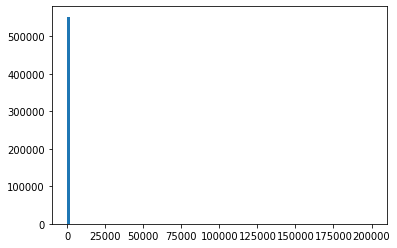

In [190]:
plt.hist(finalData['duration'], bins=100)
plt.show()

In [191]:
finalData['duration'].describe()

count    552020.000000
mean         25.841395
std         477.967443
min           0.000000
25%           6.850000
50%          11.450000
75%          20.066667
max      199907.633333
Name: duration, dtype: float64

¿Que pasó?  Hay outliers en los datos... Limitemonos entonces a aquellos datos con duraciones menores a 1 dia.

In [194]:
sum(finalData['duration']> 24*60)

409

In [195]:
finalData[finalData['duration']<24*60]['duration']

0         0.150000
1         3.666667
2         0.933333
3         1.066667
4         0.200000
            ...   
552068    8.783333
552069    3.766667
552070    8.916667
552071    7.150000
552072    3.316667
Name: duration, Length: 551611, dtype: float64

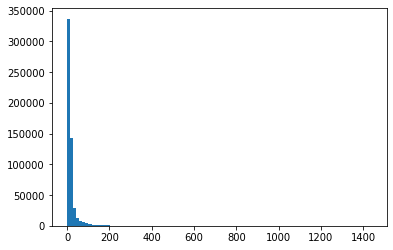

In [222]:
plt.hist(finalData[finalData['duration']<24*60]['duration'], bins=100)
plt.show()

Mas razonable. Actualicemos los datos solo a aquellos viajes que duran menos de 24 horas.

In [197]:
finalData = finalData[finalData['duration']<24*60]
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
0,8,0.150000,2011-07-28 10:12:00.040,23.0,2011-07-28 10:12:00.040,23.0,B00468,Registered,97217,1976.0,Male
1,9,3.666667,2011-07-28 10:21:00.040,23.0,2011-07-28 10:25:00.040,23.0,B00554,Registered,2215,1966.0,Male
2,10,0.933333,2011-07-28 10:33:00.040,23.0,2011-07-28 10:34:00.040,23.0,B00456,Registered,2108,1943.0,Male
3,11,1.066667,2011-07-28 10:35:00.040,23.0,2011-07-28 10:36:00.040,23.0,B00554,Registered,2116,1981.0,Female
4,12,0.200000,2011-07-28 10:37:00.040,23.0,2011-07-28 10:37:00.040,23.0,B00554,Registered,97214,1983.0,Female
...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46.0,2012-10-01 20:32:00.040,67.0,B00486,Casual,NaN,NaN,NaN
552069,623508,3.766667,2012-10-01 20:24:00.040,25.0,2012-10-01 20:28:00.040,26.0,B00170,Registered,02118,1986.0,Male
552070,623509,8.916667,2012-10-01 20:25:00.040,16.0,2012-10-01 20:34:00.040,47.0,T01067,Registered,02113,1965.0,Male
552071,623512,7.150000,2012-10-01 20:29:00.040,61.0,2012-10-01 20:36:00.040,33.0,B00621,Registered,02135,1986.0,Male


Usemos las fechas. Estas pertenecen al tipo `DateTime`, por lo que podemos hacerles preguntas a ese registro, como el día de la semana de cada fecha, o el mes, etc.   <br>

Partamos analizando las fechas en que se realizan los viajes, y los dias de semana que corresponden.

In [208]:
finalData['start_date'].dt.day_name()
#.dt.day_name()
#finalData['start_date'].dt.dayofweek

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
            ...   
552068      Monday
552069      Monday
552070      Monday
552071      Monday
552072      Monday
Name: start_date, Length: 551611, dtype: object

In [212]:
finalData['dia_semana'] = finalData['start_date'].dt.day_name()

<ipython-input-212-9527532ece51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['dia_semana'] = finalData['start_date'].dt.day_name()


In [216]:
finalData['dia_semana']=finalData['dia_semana'].astype('category')

<ipython-input-216-7ae7986174cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['dia_semana']=finalData['dia_semana'].astype('category')


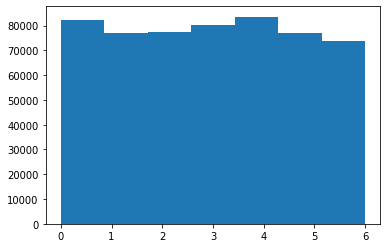

In [218]:
plt.hist(finalData['start_date'].dt.dayofweek, bins=7)
plt.show()

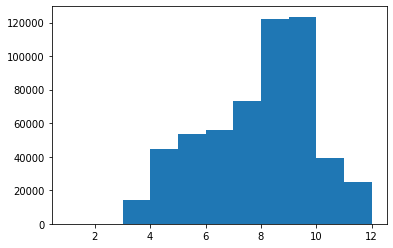

In [226]:
plt.hist(finalData['start_date'].dt.month, bins=range(1,13))
plt.show()

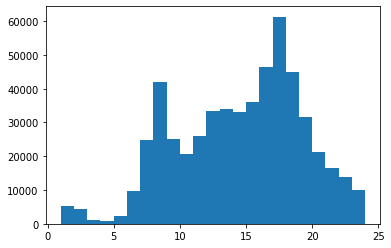

In [228]:
plt.hist(finalData['start_date'].dt.hour, bins=range(1,25))
plt.show()

In [238]:
tmp=finalData[finalData['start_date'].dt.dayofweek>=5]

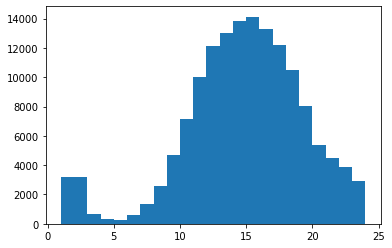

In [239]:
plt.hist(tmp['start_date'].dt.hour, bins=range(1,25))
plt.show()

Tambien podemos agregar una columna a la tabla. Por ejemplo, agreguemos el mes de cada viaje

In [229]:
finalData['start_month'] = finalData['start_date'].dt.month
finalData

<ipython-input-229-07735d57d753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['start_month'] = finalData['start_date'].dt.month


,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,dia_semana,start_month
0,8,0.150000,2011-07-28 10:12:00.040,23.0,2011-07-28 10:12:00.040,23.0,B00468,Registered,97217,1976.0,Male,Thursday,7
1,9,3.666667,2011-07-28 10:21:00.040,23.0,2011-07-28 10:25:00.040,23.0,B00554,Registered,2215,1966.0,Male,Thursday,7
2,10,0.933333,2011-07-28 10:33:00.040,23.0,2011-07-28 10:34:00.040,23.0,B00456,Registered,2108,1943.0,Male,Thursday,7
3,11,1.066667,2011-07-28 10:35:00.040,23.0,2011-07-28 10:36:00.040,23.0,B00554,Registered,2116,1981.0,Female,Thursday,7
4,12,0.200000,2011-07-28 10:37:00.040,23.0,2011-07-28 10:37:00.040,23.0,B00554,Registered,97214,1983.0,Female,Thursday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46.0,2012-10-01 20:32:00.040,67.0,B00486,Casual,NaN,NaN,NaN,Monday,10
552069,623508,3.766667,2012-10-01 20:24:00.040,25.0,2012-10-01 20:28:00.040,26.0,B00170,Registered,02118,1986.0,Male,Monday,10
552070,623509,8.916667,2012-10-01 20:25:00.040,16.0,2012-10-01 20:34:00.040,47.0,T01067,Registered,02113,1965.0,Male,Monday,10
552071,623512,7.150000,2012-10-01 20:29:00.040,61.0,2012-10-01 20:36:00.040,33.0,B00621,Registered,02135,1986.0,Male,Monday,10


In [242]:
tmp=finalData[finalData['gender']=="Female"]
tmp

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,dia_semana,start_month
3,11,1.066667,2011-07-28 10:35:00.040,23.0,2011-07-28 10:36:00.040,23.0,B00554,Registered,2116,1981.0,Female,Thursday,7
4,12,0.200000,2011-07-28 10:37:00.040,23.0,2011-07-28 10:37:00.040,23.0,B00554,Registered,97214,1983.0,Female,Thursday,7
6,14,0.400000,2011-07-28 10:47:00.040,23.0,2011-07-28 10:47:00.040,23.0,B00554,Registered,2140,1971.0,Female,Thursday,7
7,15,0.116667,2011-07-28 10:48:00.040,23.0,2011-07-28 10:48:00.040,23.0,B00554,Registered,2140,1971.0,Female,Thursday,7
8,16,0.133333,2011-07-28 11:01:00.040,23.0,2011-07-28 11:01:00.040,23.0,B00554,Registered,97214,1983.0,Female,Thursday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552048,623484,12.616667,2012-10-01 20:13:00.040,9.0,2012-10-01 20:26:00.040,46.0,T01216,Registered,02115,1982.0,Female,Monday,10
552051,623488,7.300000,2012-10-01 20:15:00.040,40.0,2012-10-01 20:22:00.040,35.0,B00234,Registered,02111,1974.0,Female,Monday,10
552052,623489,3.383333,2012-10-01 20:15:00.040,6.0,2012-10-01 20:18:00.040,38.0,T01078,Registered,02114,1978.0,Female,Monday,10
552062,623501,9.733333,2012-10-01 20:22:00.040,96.0,2012-10-01 20:31:00.040,80.0,T01088,Registered,02139,1983.0,Female,Monday,10


### Comentario técnico:
Cuando los índices son enteros y pedimos `data[3]`, puede ser consuso entender si esto es el indice 3 o la posición 3. Para evitar confuciones, están las funciones `.loc()` y `.iloc()`

In [247]:
data = pd.Series(['a', 'b', 'c','d'], index=[1, 3, 5,8])
data

1    a
3    b
5    c
8    d
dtype: object

In [248]:
data[3]
data.loc[3]  #busque el index 3 y retorne su valor
data.iloc[3] # busque la posicion 3 del vector y retorne su valor

'd'

Pregunta: ¿Como desplegar la primera linea de los datos?

In [272]:
finalData.iloc[0]  # Como si fuera una matriz, fila 0
finalData.head(3)  # los primeros "n" datos

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,dia_semana,start_month
0,8,0.150000,2011-07-28 10:12:00.040,23.0,2011-07-28 10:12:00.040,23.0,B00468,Registered,97217,1976.0,Male,Thursday,7
1,9,3.666667,2011-07-28 10:21:00.040,23.0,2011-07-28 10:25:00.040,23.0,B00554,Registered,2215,1966.0,Male,Thursday,7
2,10,0.933333,2011-07-28 10:33:00.040,23.0,2011-07-28 10:34:00.040,23.0,B00456,Registered,2108,1943.0,Male,Thursday,7


# Analizando los datos. 
 Ok, tenemos los datos ya limpios. Esto es generalmente muy tedioso,
 pero vimos que tenemos herramientas para poder hacerlo de forma un 
 poco mas sencilla. 
  Ahora queremos empezar a hacer algunos análisis. Para esto, utilizaremos
 algunas funciones propias de los `Dataframes`:

La estructura de datos de cada columna permite aplicar algunas funciones "agregadoras" básicas, por ejemplo, ver promedio `.mean()`, contar `.count()`, sumar `.sum()`, mínimo `.min()`, máximo `.max()`, etc.

In [283]:
finalData['duration'].mean()

21.616271490839257

como vimos antes, también podemos usar `describe()` para mostrar algunas de las estadísticas más comunes.

Pero: ¿si quisieramos tener la duración promedio por género?  Esto implica que deberíamos **separar** el conjunto en  grupos (uno por cada género), **aplicar** la función (`.mean()` en este caso) y **combinar** los resultados en una tabla final.

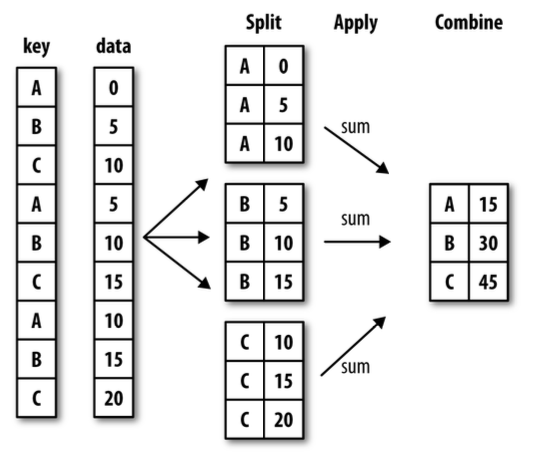

Este concepto, conocido como `split-apply-combine` es clave en el análisis de datos. En Panda, esto se hace con el comando `.groupby(<como agrupar>)`

In [284]:
finalData.groupby('gender')

In [286]:
finalData.groupby('gender')['duration'].mean()

gender
Female    13.477725
Male      11.143362
Name: duration, dtype: float64

In [287]:
finalData.groupby('subscription_type')['duration'].mean()

subscription_type
Casual        39.560557
Registered    11.722582
Name: duration, dtype: float64

Podemos agrupar por mas de una columna

In [288]:
finalData.groupby(['subscription_type','gender'])['duration'].mean()

subscription_type  gender
Casual             Female          NaN
                   Male            NaN
Registered         Female    13.477725
                   Male      11.143362
Name: duration, dtype: float64

O incluso por una columna externa.

In [290]:
tmp=finalData['birth_date']>1980
tmp

0         False
1         False
2         False
3          True
4          True
          ...  
552068    False
552069     True
552070    False
552071     True
552072     True
Name: birth_date, Length: 551611, dtype: bool

In [291]:
finalData.groupby(tmp)['duration'].mean()

birth_date
False    25.712564
True     11.647627
Name: duration, dtype: float64

In [295]:
finalData

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,dia_semana,start_month
0,8,0.150000,2011-07-28 10:12:00.040,23.0,2011-07-28 10:12:00.040,23.0,B00468,Registered,97217,1976.0,Male,Thursday,7
1,9,3.666667,2011-07-28 10:21:00.040,23.0,2011-07-28 10:25:00.040,23.0,B00554,Registered,2215,1966.0,Male,Thursday,7
2,10,0.933333,2011-07-28 10:33:00.040,23.0,2011-07-28 10:34:00.040,23.0,B00456,Registered,2108,1943.0,Male,Thursday,7
3,11,1.066667,2011-07-28 10:35:00.040,23.0,2011-07-28 10:36:00.040,23.0,B00554,Registered,2116,1981.0,Female,Thursday,7
4,12,0.200000,2011-07-28 10:37:00.040,23.0,2011-07-28 10:37:00.040,23.0,B00554,Registered,97214,1983.0,Female,Thursday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46.0,2012-10-01 20:32:00.040,67.0,B00486,Casual,NaN,NaN,NaN,Monday,10
552069,623508,3.766667,2012-10-01 20:24:00.040,25.0,2012-10-01 20:28:00.040,26.0,B00170,Registered,02118,1986.0,Male,Monday,10
552070,623509,8.916667,2012-10-01 20:25:00.040,16.0,2012-10-01 20:34:00.040,47.0,T01067,Registered,02113,1965.0,Male,Monday,10
552071,623512,7.150000,2012-10-01 20:29:00.040,61.0,2012-10-01 20:36:00.040,33.0,B00621,Registered,02135,1986.0,Male,Monday,10


**Pregunta**: ¿Cuál es la duración promedio de los viajes para cada tipo de suscriptor?

In [297]:
finalData.columns

Index(['id', 'duration', 'start_date', 'start_station', 'end_date',
       'end_station', 'bike_nr', 'subscription_type', 'zip_code', 'birth_date',
       'gender', 'dia_semana', 'start_month'],
      dtype='object')

In [296]:
finalData.groupby('subscription_type')['duration'].mean()

subscription_type
Casual        39.560557
Registered    11.722582
Name: duration, dtype: float64

In [302]:
finalData.groupby('subscription_type')['duration'].apply(np.mean)

subscription_type
Casual        39.560557
Registered    11.722582
Name: duration, dtype: float64

**PREGUNTA 1**: ¿Cual es la duración promedio por género?

In [303]:
finalData.groupby('gender')['duration'].mean()

gender
Female    13.477725
Male      11.143362
Name: duration, dtype: float64

**PREGUNTA 2**: ¿Cual es el total de minutos por género?

In [304]:
finalData.groupby('gender')['duration'].sum()

gender
Female    1.189086e+06
Male      2.979078e+06
Name: duration, dtype: float64

In [305]:
finalData.groupby('gender')['duration'].count()

gender
Female     88226
Male      267341
Name: duration, dtype: int64

**PREGUNTA 3**: ¿Cuál es la duración promedio para cada día de la semana? (usemos la fecha de inicio del viaje)

In [311]:
aux=finalData['start_date'].dt.dayofweek
finalData.groupby(aux)['duration'].mean()

start_date
0    19.364533
1    17.174780
2    17.526173
3    16.690964
4    19.379387
5    30.778098
6    31.385722
Name: duration, dtype: float64

In [315]:
finalData.groupby(finalData['start_date'].dt.day_name())['duration'].mean()

start_date
Friday       19.379387
Monday       19.364533
Saturday     30.778098
Sunday       31.385722
Thursday     16.690964
Tuesday      17.174780
Wednesday    17.526173
Name: duration, dtype: float64

**PREGUNTA 4**: ¿Cuál es la duración promedio para cada mes del año? (usemos la fecha de término del viaje)

In [317]:
finalData.groupby(finalData['end_date'].dt.month)['duration'].mean()

end_date
3     20.545315
4     18.493682
5     18.611862
6     17.358136
7     20.134779
8     24.697308
9     21.833481
10    28.366187
11    21.398513
12    16.875000
Name: duration, dtype: float64

**Pregunta**: ¿Cuál es la proporción de usuarios `Casual` para cada estación de inicio? 

In [322]:
sum(finalData['subscription_type']=="Casual")/len(finalData['subscription_type'])

0.35540262975176345

Otra opción es que nosotros hagamos una función que entregue esta proporción. Por ejemplo:

In [323]:
def propCasual(data):
    numero_casual = sum(data['subscription_type']=="Casual")
    numero_total = len(data['subscription_type'])
    return numero_casual/numero_total

In [324]:
propCasual(finalData)

0.35540262975176345

In [328]:
finalData.groupby('start_station').apply(propCasual)

start_station
3.0     0.289539
4.0     0.290126
5.0     0.353937
6.0     0.351005
7.0     0.438072
          ...   
94.0    0.571984
95.0    0.358974
96.0    0.376518
97.0    0.710623
98.0    0.594796
Length: 95, dtype: float64

**Ejercicio**: La empresa tiene una tarifa distinta para aquellos viajes que duran mas de media hora.   Por eso, Calcule la proporción de viajes desde cada estación de inicio (*start_station*) que duran mas de 30 minutos. 

In [329]:
def propViajes30min(data):
    numero_largos = sum(data['duration']>30)
    numero_total = len(data['duration'])
    return numero_largos/numero_total

In [330]:
propViajes30min(finalData)

0.12154036087025095

In [331]:
finalData.groupby('start_station').apply(propViajes30min)

start_station
3.0     0.085264
4.0     0.076041
5.0     0.099347
6.0     0.130794
7.0     0.153276
          ...   
94.0    0.124514
95.0    0.069597
96.0    0.080972
97.0    0.256410
98.0    0.161710
Length: 95, dtype: float64

In [333]:
finalData.groupby('start_station').apply(propViajes30min).sort_values()

start_station
26.0    0.038899
14.0    0.042330
19.0    0.049587
57.0    0.049974
39.0    0.056280
          ...   
93.0    0.266667
74.0    0.276288
37.0    0.336530
15.0    0.352891
92.0    0.607595
Length: 95, dtype: float64

Supongamos ahora que queremos rescatar los dos días mas utilizados, por cada tipo de usuario, o por estación. Esto requeriría crea una propia función, que nos entregue los dos dias. Pero esto sabemos hacerlo!


In [334]:
finalData['start_day_name'] = finalData['start_date'].dt.day_name()
finalData

<ipython-input-334-6e6a0d869054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['start_day_name'] = finalData['start_date'].dt.day_name()


,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,dia_semana,start_month,start_day_name
0,8,0.150000,2011-07-28 10:12:00.040,23.0,2011-07-28 10:12:00.040,23.0,B00468,Registered,97217,1976.0,Male,Thursday,7,Thursday
1,9,3.666667,2011-07-28 10:21:00.040,23.0,2011-07-28 10:25:00.040,23.0,B00554,Registered,2215,1966.0,Male,Thursday,7,Thursday
2,10,0.933333,2011-07-28 10:33:00.040,23.0,2011-07-28 10:34:00.040,23.0,B00456,Registered,2108,1943.0,Male,Thursday,7,Thursday
3,11,1.066667,2011-07-28 10:35:00.040,23.0,2011-07-28 10:36:00.040,23.0,B00554,Registered,2116,1981.0,Female,Thursday,7,Thursday
4,12,0.200000,2011-07-28 10:37:00.040,23.0,2011-07-28 10:37:00.040,23.0,B00554,Registered,97214,1983.0,Female,Thursday,7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552068,623507,8.783333,2012-10-01 20:24:00.040,46.0,2012-10-01 20:32:00.040,67.0,B00486,Casual,NaN,NaN,NaN,Monday,10,Monday
552069,623508,3.766667,2012-10-01 20:24:00.040,25.0,2012-10-01 20:28:00.040,26.0,B00170,Registered,02118,1986.0,Male,Monday,10,Monday
552070,623509,8.916667,2012-10-01 20:25:00.040,16.0,2012-10-01 20:34:00.040,47.0,T01067,Registered,02113,1965.0,Male,Monday,10,Monday
552071,623512,7.150000,2012-10-01 20:29:00.040,61.0,2012-10-01 20:36:00.040,33.0,B00621,Registered,02135,1986.0,Male,Monday,10,Monday


In [337]:
#resumenDias = finalData.groupby('start_day_name')['start_day_name'].count()
finalData.groupby('start_day_name')['start_day_name'].count()

start_day_name
Friday       83601
Monday       82261
Saturday     76894
Sunday       73956
Thursday     80061
Tuesday      77222
Wednesday    77616
Name: start_day_name, dtype: int64

In [343]:
finalData.groupby('start_day_name')['start_day_name'].count().sort_values(ascending=False)

start_day_name
Friday       83601
Monday       82261
Thursday     80061
Wednesday    77616
Tuesday      77222
Saturday     76894
Sunday       73956
Name: start_day_name, dtype: int64

In [347]:
finalData.groupby('start_day_name')['start_day_name'].count()

start_day_name
Friday       83601
Monday       82261
Saturday     76894
Sunday       73956
Thursday     80061
Tuesday      77222
Wednesday    77616
Name: start_day_name, dtype: int64

In [348]:
finalData.groupby('start_day_name')['start_day_name'].count().sort_values(ascending=False)

start_day_name
Friday       83601
Monday       82261
Thursday     80061
Wednesday    77616
Tuesday      77222
Saturday     76894
Sunday       73956
Name: start_day_name, dtype: int64

In [349]:
finalData.groupby('start_day_name')['start_day_name'].count().sort_values(ascending=False).head(2)

start_day_name
Friday    83601
Monday    82261
Name: start_day_name, dtype: int64

In [350]:
finalData.groupby('start_day_name')['start_day_name'].count().sort_values(ascending=False).head(2).index

Index(['Friday', 'Monday'], dtype='object', name='start_day_name')

In [351]:
list(finalData.groupby('start_day_name')['start_day_name'].count().sort_values(ascending=False).head(2).index)

['Friday', 'Monday']

In [352]:
list(resumenDias.sort_values(ascending=False).head(2).index)

['Friday', 'Monday']

Pomgamos todo esto en una función:

In [353]:
def best2days(x):
    resumenDias = x.groupby('start_day_name')['start_day_name'].count()
    return list(resumenDias.sort_values(ascending=False).head(2).index)

In [354]:
best2days(finalData)

['Friday', 'Monday']

In [355]:
finalData.groupby('subscription_type').apply(best2days)

subscription_type
Casual         [Saturday, Sunday]
Registered    [Thursday, Tuesday]
dtype: object

**Ejercicio:** encuentre el tipo de suscripción más común para cada estación de partida.   

In [366]:
def sub_mas_comun(x):
    num_casual = sum(x['subscription_type']=="Casual")
    num_reg = sum(x['subscription_type']=="Registered")
    if num_casual > num_reg:
        return "Casual"
    else:
        return "Registered"
    

In [367]:
sub_mas_comun(finalData)

'Registered'

In [368]:
finalData.groupby('start_station').apply(sub_mas_comun)

start_station
3.0     Registered
4.0     Registered
5.0     Registered
6.0     Registered
7.0     Registered
           ...    
94.0        Casual
95.0    Registered
96.0    Registered
97.0        Casual
98.0        Casual
Length: 95, dtype: object

In [370]:
def sub_mas_comun(x):
    resumenDias = x.groupby('subscription_type')['subscription_type'].count()
    return list(resumenDias.sort_values(ascending=False).index[0:1])
sub_mas_comun(finalData)
finalData.groupby('start_station').apply(sub_mas_comun)

start_station
3.0     [Registered]
4.0     [Registered]
5.0     [Registered]
6.0     [Registered]
7.0     [Registered]
            ...     
94.0        [Casual]
95.0    [Registered]
96.0    [Registered]
97.0        [Casual]
98.0        [Casual]
Length: 95, dtype: object

Podemos hacer que retorne un DataFrame, de esta forma el resultado será la union de todos estos dataframe, generando una nueva tabla

Cree un nuevo `DataFrame` de bicicletas, donde cada fila tenga:
- El id de cada bicicleta `bike_nr`
- la duración promedio de cada bicicleta
- la desviación estándar de las duraciones de cada bicicleta
- el número de viajes realizados en cada bicicleta

Para esto, podemos hacer que el resultado de la función a aplicar sobre cada grupo sea un `Dataframe`, por lo que al combinarlo tendremos el dataframe pedido.   Para definir un DataFrame usamos el comando `DataFrame`.

In [379]:
def statsBike(x):
    prom = x['duration'].mean()
    dev = x['duration'].std()
    num = x['duration'].count()
    return [prom,dev,num]

In [383]:
finalData.groupby('bike_nr').apply(statsBike)

bike_nr
? (0x241EC230)     [33.170138888888886, 60.41472501744495, 192]
? (0x67D8478F)      [25.73062015503876, 40.00103415496366, 129]
? (0xA533D104)     [38.82852112676056, 107.23705791448033, 142]
B00000              [11.863333333333337, 7.971571648392464, 45]
B00001            [18.051804215791353, 32.528162361042305, 933]
                                      ...                      
T01447            [19.926090342679128, 22.907668786529175, 214]
T01448             [17.29666666666667, 27.434640408401332, 315]
T01449            [19.712345679012348, 37.349238093496325, 243]
T01450             [17.281904761904762, 42.33884965262123, 280]
b00225             [17.541197497765864, 38.80963265532772, 746]
Length: 885, dtype: object

In [419]:
def statsBikeDF(x):
    prom = x['duration'].mean()
    dev = x['duration'].std()
    num = x['duration'].count()
    return pd.DataFrame({'mean_duration': [prom], 'stddev_duration': [dev], 'num_trips': [num]})

In [420]:
statsBikeDF(finalData)

,mean_duration,stddev_duration,num_trips
0,21.616271,58.056289,551611


In [421]:
finalData['bike_nr'].mode().iloc[0]

'B00145'

In [440]:
bikes= finalData.groupby('bike_nr').apply(statsBikeDF)
bikes

,,mean_duration,stddev_duration,num_trips
bike_nr,,,,
? (0x241EC230),0,33.170139,60.414725,192
? (0x67D8478F),0,25.730620,40.001034,129
? (0xA533D104),0,38.828521,107.237058,142
B00000,0,11.863333,7.971572,45
B00001,0,18.051804,32.528162,933
...,...,...,...,...
T01447,0,19.926090,22.907669,214
T01448,0,17.296667,27.434640,315
T01449,0,19.712346,37.349238,243


In [432]:
bikes['mean_duration'].max()

56.04894736842105

In [441]:
bikes = bikes.reset_index()
bikes

,bike_nr,level_1,mean_duration,stddev_duration,num_trips
0,? (0x241EC230),0,33.170139,60.414725,192
1,? (0x67D8478F),0,25.730620,40.001034,129
2,? (0xA533D104),0,38.828521,107.237058,142
3,B00000,0,11.863333,7.971572,45
4,B00001,0,18.051804,32.528162,933
...,...,...,...,...,...
880,T01447,0,19.926090,22.907669,214
881,T01448,0,17.296667,27.434640,315
882,T01449,0,19.712346,37.349238,243
883,T01450,0,17.281905,42.338850,280


In [442]:
del bikes['level_1']

In [443]:
bikes

,bike_nr,mean_duration,stddev_duration,num_trips
0,? (0x241EC230),33.170139,60.414725,192
1,? (0x67D8478F),25.730620,40.001034,129
2,? (0xA533D104),38.828521,107.237058,142
3,B00000,11.863333,7.971572,45
4,B00001,18.051804,32.528162,933
...,...,...,...,...
880,T01447,19.926090,22.907669,214
881,T01448,17.296667,27.434640,315
882,T01449,19.712346,37.349238,243
883,T01450,17.281905,42.338850,280


**Ejercicio (BONUS)**: Incluya las siguientes variables para cada fila:
- número de viajes que parten y terminan en un día diferente
- estación mas común de inicio de un viaje 
- estación mas común de término de un viaje